In [1]:
from saf_sinasc.feature_engineering import (
    load_negative_and_positive_df, 
    drop_columns, 
    pre_process_enrich_columns, 
    ensure_dtypes, 
    preprocess_inputation,
    get_dummies
)

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df1 = load_negative_and_positive_df()

df2 = drop_columns(df1)
df2 = ensure_dtypes(df2)

df = pre_process_enrich_columns(df2)
df = preprocess_inputation(df)
df = get_dummies(df)

'positives_df.shape: (1262, 72)'

'neutral_df.shape: (6310, 72)'

'remove_columns: df columns: 72'

'remove_columns: columns to drop: 28'

'remove_columns: output columns: 45'

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0, max_depth = 4, ccp_alpha = 0.001)
# clf = DecisionTreeClassifier(random_state=0)

y = df["y"]
X = df.drop(columns=["y"])

score = cross_val_score(clf, X, y, cv=20, scoring='accuracy').mean()
print(score)

0.7773087071240107


In [3]:
score = cross_val_score(clf, X, y, cv=20, scoring='f1').mean()
print(score)

0.43619709018873287


In [4]:
[i for i in X.columns]

['CODESTAB',
 'CODMUNNASC',
 'IDADEMAE',
 'CODOCUPMAE',
 'QTDFILVIVO',
 'QTDFILMORT',
 'CODMUNRES',
 'APGAR1',
 'APGAR5',
 'PESO',
 'SERIESCMAE',
 'QTDGESTANT',
 'QTDPARTNOR',
 'QTDPARTCES',
 'IDADEPAI',
 'SEMAGESTAC',
 'CONSPRENAT',
 'MESPRENAT',
 'ANO',
 'ESCMAE2010',
 'CODUFNATU',
 'CODMUNCART',
 'LOCNASC_Domicílio',
 'LOCNASC_Hospital',
 'LOCNASC_Ignorado',
 'LOCNASC_Outro Estab. Saúde',
 'LOCNASC_Outros',
 'ESTCIVMAE_Casado',
 'ESTCIVMAE_Ignorado',
 'ESTCIVMAE_Separado Judic./Divorciado',
 'ESTCIVMAE_Solteiro',
 'ESTCIVMAE_União consensual',
 'ESTCIVMAE_Viúvo',
 'ESCMAE_1 a 3 anos',
 'ESCMAE_12 e mais',
 'ESCMAE_4 a 7 anos',
 'ESCMAE_8 a 11 anos',
 'ESCMAE_Ignorado',
 'ESCMAE_Nenhuma',
 'ESCMAEAGR1_Ensino Médio Completo',
 'ESCMAEAGR1_Ensino Médio Incompleto',
 'ESCMAEAGR1_Ensino Médio Incompleto ou Inespecífico',
 'ESCMAEAGR1_Fundamental I Completo',
 'ESCMAEAGR1_Fundamental I Incompleto',
 'ESCMAEAGR1_Fundamental I Incompleto ou Inespecífico',
 'ESCMAEAGR1_Fundamental II Complet

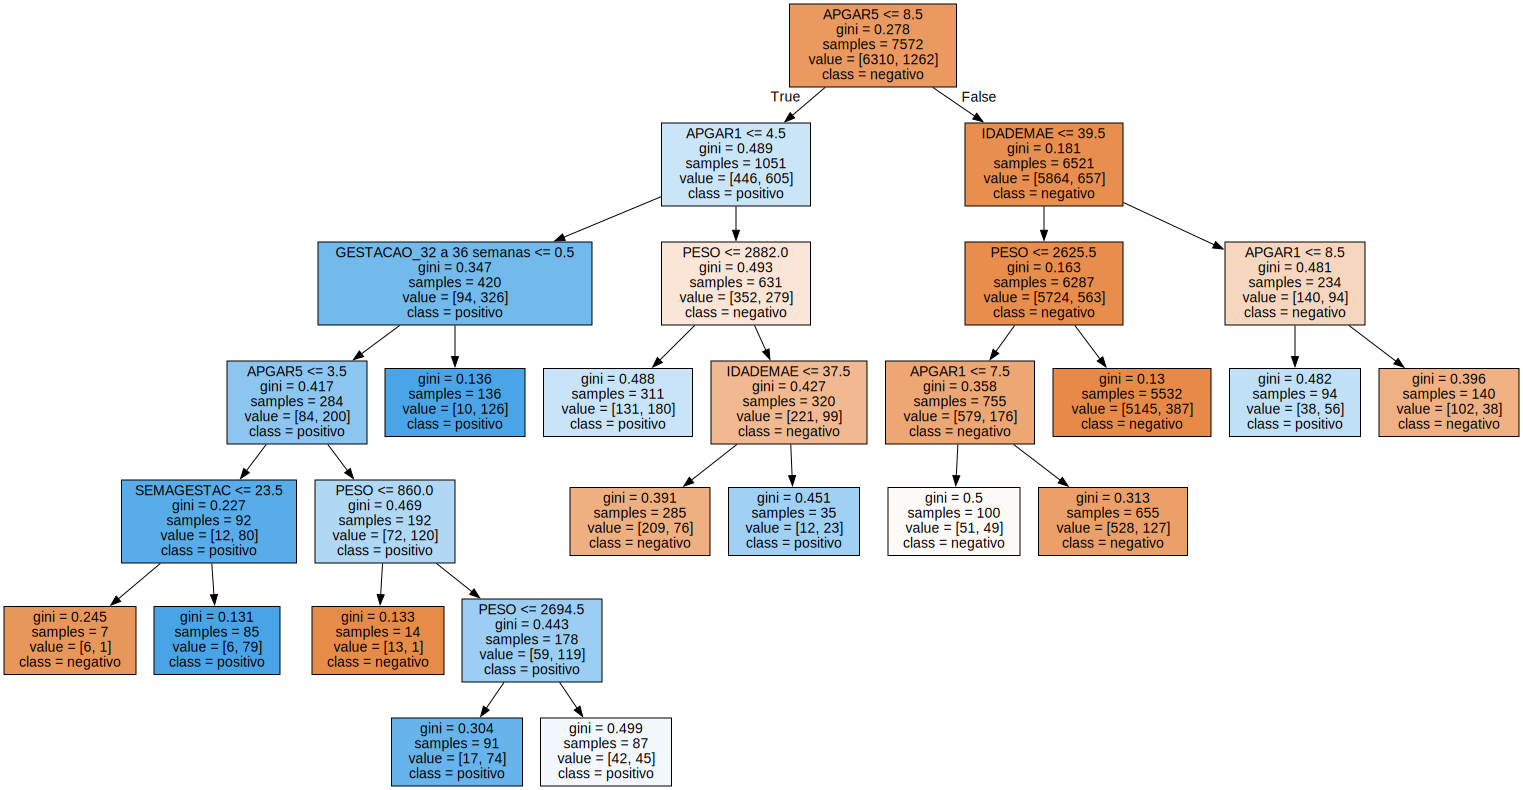

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0, ccp_alpha = 0.001).fit(X, y)

from sklearn.tree import export_graphviz
export_graphviz(
    tree, 
    out_file="tree.dot", 
    class_names=['negativo', "positivo"],
    feature_names=X.columns, 
    impurity=True, 
    filled=True
)

import graphviz
from pathlib import Path
with open(Path("tree.dot")) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 4, ccp_alpha = 0.001, random_state=0).fit(X, y)

from sklearn.tree import export_graphviz
export_graphviz(
    tree, 
    out_file="tree.dot", 
    class_names=['negativo', "positivo"],
    feature_names=X.columns, 
    impurity=True, 
    filled=True
)

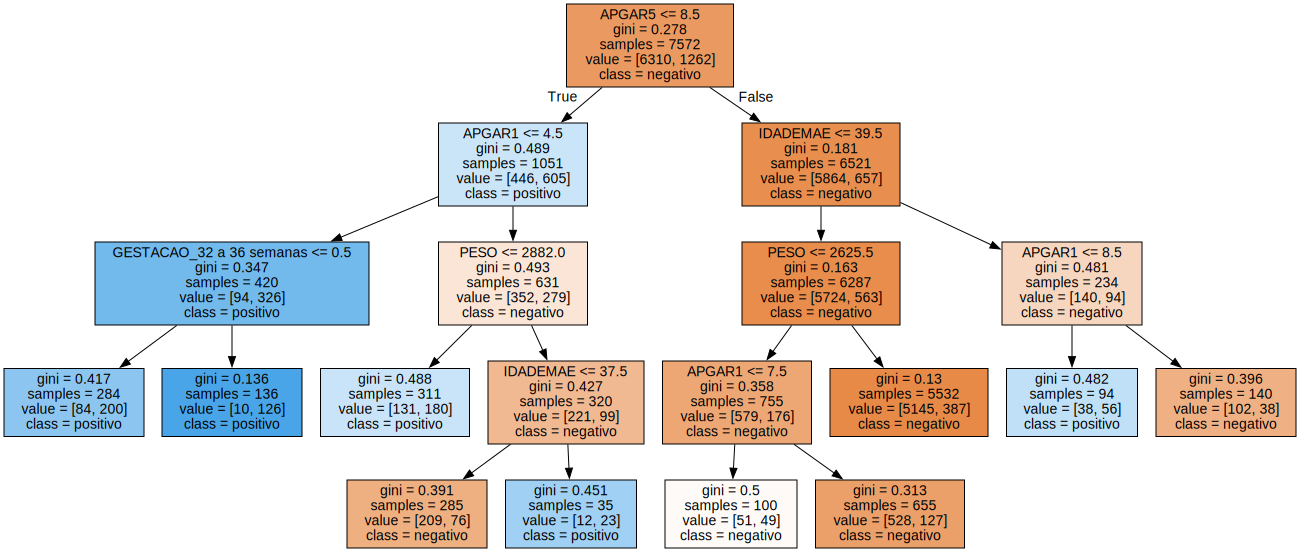

In [7]:
import graphviz
from pathlib import Path
with open(Path("tree.dot")) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [8]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

tree = DecisionTreeClassifier(max_depth = 4, ccp_alpha = 0.001).fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [9]:
print(classification_report(y_test, y_pred, target_names=['negativo', 'positivo']))

              precision    recall  f1-score   support

    negativo       0.89      0.97      0.93      1575
    positivo       0.73      0.38      0.50       318

    accuracy                           0.87      1893
   macro avg       0.81      0.68      0.71      1893
weighted avg       0.86      0.87      0.86      1893



In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.872688853671421

In [11]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5010351966873707

In [12]:
y_test.value_counts()

0    1575
1     318
Name: y, dtype: int64

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# cols - previsao, rows - valor real
# 44 - false positives
# 197 - false negatives

array([[1531,   44],
       [ 197,  121]])

In [14]:
confusion_matrix(y_test, y_pred, normalize='true')

array([[0.97206349, 0.02793651],
       [0.61949686, 0.38050314]])